### Preprocessing

In [1]:
import os
from PIL import Image
import pandas as pd
import numpy as np

In [2]:
test_path = './data/seg_test/seg_test/'
train_path = './data/seg_train/seg_train/'

In [5]:
# functions that check images with 1. incorrect size; 2. single color (all black, all white etc); and 3. grascale images

def dataframe_img(filepath):
    subfolders = ['buildings/', 'forest/', 'glacier/', 'mountain/', 'sea/', 'street/']
    
    paths = []
    labels = []
    incorrect_size_files = []
    single_color_files = []
    grayscale_files = []

    for folder in subfolders:
        full_path = os.path.join(filepath, folder)
        files = [os.path.join(full_path, file) for file in os.listdir(full_path)]

        for file in files:
            try:
                with Image.open(file) as img:
                    # Check if image size is not 150 x 150
                    if img.size != (150, 150):
                        incorrect_size_files.append(file)

                    img_array = np.array(img)

                    # Check if all pixels have the same RGB values
                    if np.all(img_array == img_array[0,0,:]):
                        single_color_files.append(file)

                    # Check if the image is grayscale
                    if img_array.ndim == 2 or np.all(img_array[:,:,0] == img_array[:,:,1]) and np.all(img_array[:,:,1] == img_array[:,:,2]):
                        grayscale_files.append(file)

            except (IOError, OSError):
                print(f"Cannot process {file}")

        label = folder.rstrip('/')
        paths += files
        labels += [label] * len(files)

    df = pd.DataFrame({'files': paths, 'labels': labels})

    return df, incorrect_size_files, single_color_files, grayscale_files


In [6]:
train_df, train_incorrect_size, train_single_color, train_grayscale = dataframe_img(train_path)
test_df, test_incorrect_size, test_single_color, test_grayscale = dataframe_img(test_path)

In [7]:
train_df, train_incorrect_size, train_single_color, train_grayscale

(                                                files     labels
 0          ./data/seg_train/seg_train/buildings/0.jpg  buildings
 1      ./data/seg_train/seg_train/buildings/10006.jpg  buildings
 2       ./data/seg_train/seg_train/buildings/1001.jpg  buildings
 3      ./data/seg_train/seg_train/buildings/10014.jpg  buildings
 4      ./data/seg_train/seg_train/buildings/10018.jpg  buildings
 ...                                               ...        ...
 14029      ./data/seg_train/seg_train/street/9961.jpg     street
 14030      ./data/seg_train/seg_train/street/9967.jpg     street
 14031      ./data/seg_train/seg_train/street/9978.jpg     street
 14032      ./data/seg_train/seg_train/street/9989.jpg     street
 14033       ./data/seg_train/seg_train/street/999.jpg     street
 
 [14034 rows x 2 columns],
 ['./data/seg_train/seg_train/buildings/5358.jpg',
  './data/seg_train/seg_train/forest/1004.jpg',
  './data/seg_train/seg_train/forest/12108.jpg',
  './data/seg_train/seg_train/f

In [8]:
test_df, test_incorrect_size, test_single_color, test_grayscale

(                                             files     labels
 0     ./data/seg_test/seg_test/buildings/20057.jpg  buildings
 1     ./data/seg_test/seg_test/buildings/20060.jpg  buildings
 2     ./data/seg_test/seg_test/buildings/20061.jpg  buildings
 3     ./data/seg_test/seg_test/buildings/20064.jpg  buildings
 4     ./data/seg_test/seg_test/buildings/20073.jpg  buildings
 ...                                            ...        ...
 2995     ./data/seg_test/seg_test/street/24292.jpg     street
 2996     ./data/seg_test/seg_test/street/24300.jpg     street
 2997     ./data/seg_test/seg_test/street/24315.jpg     street
 2998     ./data/seg_test/seg_test/street/24317.jpg     street
 2999     ./data/seg_test/seg_test/street/24332.jpg     street
 
 [3000 rows x 2 columns],
 ['./data/seg_test/seg_test/forest/22014.jpg',
  './data/seg_test/seg_test/glacier/21274.jpg',
  './data/seg_test/seg_test/glacier/21657.jpg',
  './data/seg_test/seg_test/glacier/21982.jpg',
  './data/seg_test/seg_te

In [9]:
# size of train and test df
train_df.shape, test_df.shape

((14034, 2), (3000, 2))

In [10]:
# number of incorrect sized images in train and test df
len(train_incorrect_size),len(test_incorrect_size)

(48, 7)

In [11]:
# number of grayscale images in train and test df
len(train_grayscale),len(test_grayscale)

(616, 137)

In [12]:
# number of single-colored images in train and test df
len(train_single_color),len(test_single_color)

(0, 0)

In [16]:
train_df['labels'].unique(),\
test_df['labels'].unique()

(array(['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],
       dtype=object),
 array(['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],
       dtype=object))

In [17]:
# functions of creating sub-DataFrames that exclude:  incorrect sized images, single-color images, and grasyscale images

def create_sub_dfs(main_df, incorrect_size_files, single_color_files, grayscale_files):
    categories = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
    sub_dfs = {}

    # Convert lists to sets for faster membership checking
    incorrect_size_set = set(incorrect_size_files)
    single_color_set = set(single_color_files)
    grayscale_set = set(grayscale_files)

    for category in categories:
        # Filter by category
        category_df = main_df[main_df['labels'] == category]

        # Exclude incorrect size, single color, and grayscale files
        category_df = category_df[~category_df['files'].isin(incorrect_size_set)]
        category_df = category_df[~category_df['files'].isin(single_color_set)]
        category_df = category_df[~category_df['files'].isin(grayscale_set)]

        # Store the DataFrame in a dictionary with the category name as the key
        sub_dfs[f'{category}_df'] = category_df

    return sub_dfs

# Create sub-DataFrames for both training and test datasets
train_sub_dfs = create_sub_dfs(train_df, train_incorrect_size, train_single_color, train_grayscale)
test_sub_dfs = create_sub_dfs(test_df, test_incorrect_size, test_single_color, test_grayscale)


In [18]:
train_sub_dfs

{'buildings_df':                                                files     labels
 0         ./data/seg_train/seg_train/buildings/0.jpg  buildings
 1     ./data/seg_train/seg_train/buildings/10006.jpg  buildings
 2      ./data/seg_train/seg_train/buildings/1001.jpg  buildings
 3     ./data/seg_train/seg_train/buildings/10014.jpg  buildings
 4     ./data/seg_train/seg_train/buildings/10018.jpg  buildings
 ...                                              ...        ...
 2186   ./data/seg_train/seg_train/buildings/9946.jpg  buildings
 2187   ./data/seg_train/seg_train/buildings/9948.jpg  buildings
 2188   ./data/seg_train/seg_train/buildings/9962.jpg  buildings
 2189   ./data/seg_train/seg_train/buildings/9966.jpg  buildings
 2190   ./data/seg_train/seg_train/buildings/9977.jpg  buildings
 
 [2096 rows x 2 columns],
 'forest_df':                                             files  labels
 2191  ./data/seg_train/seg_train/forest/10007.jpg  forest
 2192  ./data/seg_train/seg_train/forest/1001

In [29]:
# Access each sub-DataFrame for train and test datasets:
train_buildings_df = train_sub_dfs['buildings_df']
train_forest_df = train_sub_dfs['forest_df']
train_glacier_df = train_sub_dfs['glacier_df']
train_mountain_df = train_sub_dfs['mountain_df']
train_sea_df = train_sub_dfs['sea_df']
train_street_df = train_sub_dfs['street_df']

test_buildings_df = test_sub_dfs['buildings_df']
test_forest_df = test_sub_dfs['forest_df']
test_glacier_df = test_sub_dfs['glacier_df']
test_mountain_df = test_sub_dfs['mountain_df']
test_sea_df = test_sub_dfs['sea_df']
test_street_df = test_sub_dfs['street_df']

In [30]:
# Print the size of each DataFrame
for df_name, df in [('train_buildings_df', train_buildings_df),
                    ('train_forest_df', train_forest_df),
                    ('train_glacier_df', train_glacier_df),
                    ('train_mountain_df', train_mountain_df),
                    ('train_sea_df', train_sea_df),
                    ('train_street_df', train_street_df),
                    ('test_buildings_df', test_buildings_df),
                    ('test_forest_df', test_forest_df),
                    ('test_glacier_df', test_glacier_df),
                    ('test_mountain_df', test_mountain_df),
                    ('test_sea_df', test_sea_df),
                    ('test_street_df', test_street_df)]:
    print(f'The size of {df_name} is: {df.shape}')

The size of train_buildings_df is: (2096, 2)
The size of train_forest_df is: (2196, 2)
The size of train_glacier_df is: (2367, 2)
The size of train_mountain_df is: (2473, 2)
The size of train_sea_df is: (2188, 2)
The size of train_street_df is: (2051, 2)
The size of test_buildings_df is: (414, 2)
The size of test_forest_df is: (451, 2)
The size of test_glacier_df is: (544, 2)
The size of test_mountain_df is: (520, 2)
The size of test_sea_df is: (482, 2)
The size of test_street_df is: (445, 2)


In [58]:
# example:
train_buildings_df

,files,labels
0,./data/seg_train/seg_train/buildings/0.jpg,buildings
1,./data/seg_train/seg_train/buildings/10006.jpg,buildings
2,./data/seg_train/seg_train/buildings/1001.jpg,buildings
3,./data/seg_train/seg_train/buildings/10014.jpg,buildings
4,./data/seg_train/seg_train/buildings/10018.jpg,buildings
...,...,...
2186,./data/seg_train/seg_train/buildings/9946.jpg,buildings
2187,./data/seg_train/seg_train/buildings/9948.jpg,buildings
2188,./data/seg_train/seg_train/buildings/9962.jpg,buildings
2189,./data/seg_train/seg_train/buildings/9966.jpg,buildings


### Color histogram feature 

Step 1: Define a Function to Calculate Color Histograms

In [22]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def calculate_histogram(image_path, bins=256):
    # Open the image
    with Image.open(image_path) as img:
        # Convert image to numpy array
        img_array = np.array(img)
        
        # Initialize histogram
        histogram = []

        # For each color channel (R, G, B)
        for i in range(3):
            channel = img_array[:,:,i]
            hist, _ = np.histogram(channel, bins=bins, range=(0, 256))
            histogram.extend(hist)
        
        return histogram


Step 2: Loop Through Images and Calculate Histograms


In [23]:
def create_histogram_features(df):
    histograms = []

    for file_path in df['files']:
        hist = calculate_histogram(file_path)
        histograms.append(hist)

    return histograms

In [32]:
# Extract histogram for all training and test df
train_buildings_histograms = create_histogram_features(train_buildings_df)
train_forest_histograms = create_histogram_features(train_forest_df)
train_glacier_histograms = create_histogram_features(train_glacier_df)
train_mountain_histograms = create_histogram_features(train_mountain_df)
train_sea_histograms = create_histogram_features(train_sea_df)
train_street_histograms = create_histogram_features(train_street_df)

test_buildings_histograms = create_histogram_features(test_buildings_df)
test_forest_histograms = create_histogram_features(test_forest_df)
test_glacier_histograms = create_histogram_features(test_glacier_df)
test_mountain_histograms = create_histogram_features(test_mountain_df)
test_sea_histograms = create_histogram_features(test_sea_df)
test_street_histograms = create_histogram_features(test_street_df)

Step 3: Create a Feature DataFrame


In [33]:
feature_columns = [f'bin_{i}' for i in range(256 * 3)] # For each bin in R, G, B channels

In [34]:
train_buildings_features_df = pd.DataFrame(train_buildings_histograms, columns=feature_columns)
train_buildings_features_df

,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9,...,bin_758,bin_759,bin_760,bin_761,bin_762,bin_763,bin_764,bin_765,bin_766,bin_767
0,45,80,35,46,37,24,30,30,23,14,...,742,1209,1501,1606,1668,1454,814,457,123,130
1,143,34,25,29,43,35,58,45,64,48,...,89,63,34,34,26,19,24,9,21,100
2,129,30,26,35,35,36,41,31,26,33,...,64,52,43,27,19,23,22,15,14,70
3,36,9,11,15,18,15,13,26,29,24,...,114,81,86,76,75,80,53,64,48,460
4,6514,2921,1165,688,505,384,291,258,220,193,...,35,27,43,12,27,16,7,14,8,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,137,38,33,43,47,44,45,59,57,66,...,164,134,174,197,229,333,456,417,220,345
2092,41,14,10,17,17,18,19,9,21,7,...,37,26,31,27,24,10,10,7,9,26
2093,18,17,16,35,44,24,52,67,47,48,...,241,223,213,284,318,316,278,78,45,199
2094,651,262,257,248,190,127,138,100,122,110,...,154,184,153,147,121,110,99,99,69,369


In [35]:
train_forest_features_df = pd.DataFrame(train_forest_histograms, columns=feature_columns)
train_forest_features_df

,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9,...,bin_758,bin_759,bin_760,bin_761,bin_762,bin_763,bin_764,bin_765,bin_766,bin_767
0,318,72,71,75,96,78,83,108,103,131,...,0,0,0,0,0,0,0,0,0,0
1,228,34,40,58,62,64,60,62,67,68,...,6,5,6,2,8,6,2,5,6,45
2,4,2,0,4,2,1,4,3,5,1,...,1,3,2,3,3,0,0,2,1,9
3,249,62,56,54,71,62,77,54,95,72,...,3,2,0,2,2,6,0,2,1,20
4,593,69,56,63,68,70,76,95,106,98,...,1,0,0,0,0,1,0,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2191,197,110,87,132,190,169,218,233,238,257,...,3,2,0,1,2,0,0,1,3,4
2192,24,7,6,18,6,10,17,19,23,19,...,0,0,0,0,0,0,0,0,0,0
2193,437,109,86,98,100,96,97,120,122,94,...,11,10,14,10,14,13,13,9,11,59
2194,17,1,7,3,4,8,9,13,7,13,...,7,10,6,10,5,3,8,6,6,24


In [36]:
train_glacier_features_df = pd.DataFrame(train_glacier_histograms, columns=feature_columns)
train_glacier_features_df

,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9,...,bin_758,bin_759,bin_760,bin_761,bin_762,bin_763,bin_764,bin_765,bin_766,bin_767
0,106,19,12,24,18,21,27,23,33,19,...,39,39,31,37,34,32,21,18,27,215
1,21,5,14,8,17,14,14,23,20,28,...,12,7,8,5,7,10,14,14,3,35
2,434,76,63,67,82,73,90,96,83,88,...,19,22,19,26,27,33,25,26,15,129
3,15,6,9,11,12,15,14,23,26,23,...,94,80,97,120,167,175,145,277,194,3583
4,0,1,0,0,1,0,0,1,0,0,...,0,2,4,1,4,2,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2362,62,8,9,6,4,11,3,10,16,10,...,1,1,0,1,2,0,1,0,0,4
2363,26,8,6,7,9,7,11,8,12,12,...,10,12,11,6,8,6,7,7,6,24
2364,168,24,20,34,36,31,36,37,34,20,...,154,139,154,144,164,206,192,238,205,674
2365,41,6,6,11,6,10,11,10,22,15,...,48,33,24,31,28,24,19,22,14,92


In [37]:
train_mountain_features_df = pd.DataFrame(train_mountain_histograms, columns=feature_columns)
train_mountain_features_df

,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9,...,bin_758,bin_759,bin_760,bin_761,bin_762,bin_763,bin_764,bin_765,bin_766,bin_767
0,87,165,544,771,575,314,185,146,181,161,...,0,0,0,0,0,0,0,0,0,0
1,1245,216,194,164,184,165,175,178,169,198,...,8,0,1,0,0,0,0,0,0,1
2,45,9,9,21,10,20,27,36,30,41,...,0,1,0,5,1,1,0,0,1,5
3,0,0,0,0,0,0,2,0,4,7,...,531,576,518,643,622,616,483,406,286,955
4,22,1,0,3,3,5,3,5,5,9,...,17,12,15,16,7,9,8,5,3,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2468,124,16,15,11,16,11,12,14,14,15,...,0,2,0,0,0,1,0,1,0,4
2469,734,232,79,192,129,81,86,82,82,72,...,76,65,78,80,88,77,76,45,72,221
2470,10,1,2,4,1,3,2,4,3,5,...,40,53,48,43,24,9,7,1,1,2
2471,0,1,0,1,0,2,3,4,3,4,...,47,28,70,74,107,59,130,249,110,3694


In [38]:
train_sea_features_df = pd.DataFrame(train_sea_histograms, columns=feature_columns)
train_sea_features_df

,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9,...,bin_758,bin_759,bin_760,bin_761,bin_762,bin_763,bin_764,bin_765,bin_766,bin_767
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,61,17,14,21,21,37,38,40,56,57,...,1,2,1,0,0,0,0,0,0,0
2,5142,1611,1170,886,700,545,471,411,289,288,...,118,127,123,148,204,371,501,408,203,81
3,1411,559,503,533,560,565,576,588,522,523,...,26,20,28,26,19,27,26,36,25,221
4,3,0,3,1,8,4,4,7,7,13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2183,4,2,3,2,5,1,3,3,7,3,...,18,26,16,32,43,32,40,53,53,247
2184,21,1,2,4,8,7,4,4,2,7,...,9,3,0,0,1,4,0,1,0,11
2185,111,17,14,15,8,7,7,10,7,15,...,0,0,1,0,0,0,0,0,1,2
2186,45,16,10,8,8,6,7,2,3,6,...,10,6,10,11,5,3,7,4,2,32


In [39]:
train_street_features_df = pd.DataFrame(train_street_histograms, columns=feature_columns)
train_street_features_df

,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9,...,bin_758,bin_759,bin_760,bin_761,bin_762,bin_763,bin_764,bin_765,bin_766,bin_767
0,177,43,36,41,33,40,33,44,47,44,...,95,197,156,1437,153,209,109,184,114,563
1,131,65,65,183,425,749,801,582,435,392,...,4,3,2,5,5,7,3,6,6,43
2,137,34,30,65,57,40,54,48,56,50,...,116,88,71,52,50,49,41,32,31,172
3,308,115,75,121,143,149,153,132,121,97,...,1,1,0,2,1,0,0,0,0,6
4,479,167,141,190,201,209,203,220,210,196,...,0,4,1,2,4,7,3,3,1,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,14,7,8,9,24,25,32,26,38,40,...,0,0,1,0,0,1,0,0,0,4
2047,93,18,8,16,23,19,24,23,27,21,...,122,107,162,134,151,170,111,146,107,727
2048,108,37,32,50,52,53,55,61,73,73,...,54,63,95,110,157,193,256,389,333,992
2049,956,242,188,231,219,193,188,175,175,178,...,4,4,5,4,2,4,0,5,0,29


In [40]:
test_buildings_features_df = pd.DataFrame(test_buildings_histograms, columns=feature_columns)
test_buildings_features_df

,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9,...,bin_758,bin_759,bin_760,bin_761,bin_762,bin_763,bin_764,bin_765,bin_766,bin_767
0,350,58,70,53,68,52,50,59,49,43,...,248,186,175,142,131,133,107,119,87,385
1,123,14,17,17,18,17,14,24,26,20,...,11,15,13,10,10,5,10,4,3,39
2,448,202,119,159,176,150,142,159,154,120,...,124,82,102,75,79,72,75,69,52,100
3,1087,95,112,110,91,114,106,109,85,117,...,116,65,30,24,29,18,17,12,18,160
4,21,17,11,34,73,45,78,132,151,184,...,0,2,2,0,1,0,0,1,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,336,121,140,123,112,135,99,103,120,138,...,45,33,47,64,100,157,179,178,131,473
410,151,75,43,66,63,45,79,57,63,45,...,9,18,20,25,27,23,24,36,12,129
411,338,164,104,121,126,83,119,111,113,99,...,21,33,29,42,54,112,122,169,245,1546
412,107,39,17,24,24,13,18,21,14,15,...,7,8,13,8,10,4,2,5,5,63


In [41]:
test_forest_features_df = pd.DataFrame(test_forest_histograms, columns=feature_columns)
train_forest_features_df

,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9,...,bin_758,bin_759,bin_760,bin_761,bin_762,bin_763,bin_764,bin_765,bin_766,bin_767
0,318,72,71,75,96,78,83,108,103,131,...,0,0,0,0,0,0,0,0,0,0
1,228,34,40,58,62,64,60,62,67,68,...,6,5,6,2,8,6,2,5,6,45
2,4,2,0,4,2,1,4,3,5,1,...,1,3,2,3,3,0,0,2,1,9
3,249,62,56,54,71,62,77,54,95,72,...,3,2,0,2,2,6,0,2,1,20
4,593,69,56,63,68,70,76,95,106,98,...,1,0,0,0,0,1,0,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2191,197,110,87,132,190,169,218,233,238,257,...,3,2,0,1,2,0,0,1,3,4
2192,24,7,6,18,6,10,17,19,23,19,...,0,0,0,0,0,0,0,0,0,0
2193,437,109,86,98,100,96,97,120,122,94,...,11,10,14,10,14,13,13,9,11,59
2194,17,1,7,3,4,8,9,13,7,13,...,7,10,6,10,5,3,8,6,6,24


In [42]:
test_glacier_features_df = pd.DataFrame(test_glacier_histograms, columns=feature_columns)
test_glacier_features_df

,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9,...,bin_758,bin_759,bin_760,bin_761,bin_762,bin_763,bin_764,bin_765,bin_766,bin_767
0,69,7,6,13,11,6,14,18,26,26,...,14,21,16,19,7,11,16,8,6,44
1,0,1,0,0,1,1,1,2,1,2,...,140,129,101,111,117,108,106,95,83,1264
2,176,42,36,34,38,43,33,39,33,44,...,181,200,211,227,226,256,259,243,198,1240
3,52,32,20,32,35,37,41,40,35,45,...,5,8,4,3,2,8,5,10,3,58
4,40,21,11,29,21,19,22,19,23,26,...,78,85,73,48,50,41,54,45,42,142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,291,78,125,175,268,354,418,574,632,609,...,119,130,83,108,82,83,65,49,43,348
540,0,0,0,0,0,0,0,0,0,0,...,1,5,2,0,1,0,0,0,0,0
541,247,50,51,67,43,71,64,76,72,70,...,113,114,79,64,54,52,31,25,19,137
542,7,6,1,5,3,2,2,6,7,3,...,106,105,88,67,58,52,38,45,37,286


In [43]:
test_mountain_features_df = pd.DataFrame(test_mountain_histograms, columns=feature_columns)
test_mountain_features_df

,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9,...,bin_758,bin_759,bin_760,bin_761,bin_762,bin_763,bin_764,bin_765,bin_766,bin_767
0,0,0,1,0,0,0,0,3,1,0,...,9,6,8,6,4,12,8,5,8,37
1,78,16,14,28,27,28,39,25,35,49,...,2,5,1,2,3,0,1,1,1,10
2,237,54,62,83,107,100,125,115,114,136,...,23,18,18,16,11,13,16,16,10,64
3,193,63,33,59,61,54,57,57,66,63,...,453,584,605,602,655,716,708,586,334,218
4,1089,458,426,320,306,234,180,171,161,128,...,20,23,15,14,11,10,9,8,12,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,3118,1629,555,162,105,68,73,62,63,47,...,44,41,58,44,46,50,44,55,30,287
516,13,14,9,13,23,19,21,17,23,20,...,0,0,0,0,0,0,0,0,0,0
517,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
518,9,2,1,0,0,0,3,1,0,1,...,420,417,675,1046,1171,862,604,580,286,325


In [44]:
test_sea_features_df = pd.DataFrame(test_sea_histograms, columns=feature_columns)
test_sea_features_df

,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9,...,bin_758,bin_759,bin_760,bin_761,bin_762,bin_763,bin_764,bin_765,bin_766,bin_767
0,208,67,54,62,75,56,78,88,71,76,...,21,19,21,17,19,19,12,15,9,42
1,51,24,18,17,38,37,37,37,44,46,...,6,4,6,1,3,3,3,1,2,21
2,11,2,0,2,8,2,7,6,13,10,...,29,19,15,18,9,13,11,12,4,19
3,536,142,141,161,172,179,201,215,220,226,...,198,241,261,316,358,453,464,482,456,998
4,21,20,15,26,20,17,20,15,26,13,...,0,2,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,94,21,15,16,20,17,17,19,24,24,...,5,7,5,4,0,6,7,7,2,40
478,266,30,39,45,30,33,28,29,35,40,...,48,41,28,33,21,24,17,14,13,52
479,372,197,116,108,85,82,50,42,35,33,...,327,386,478,574,772,845,976,955,680,497
480,121,43,30,42,54,74,80,70,92,146,...,933,1074,793,583,312,114,68,22,24,112


In [45]:
test_street_features_df = pd.DataFrame(test_street_histograms, columns=feature_columns)
test_street_features_df

,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9,...,bin_758,bin_759,bin_760,bin_761,bin_762,bin_763,bin_764,bin_765,bin_766,bin_767
0,487,125,96,125,111,85,109,102,112,90,...,24,43,58,74,95,101,120,126,86,318
1,130,80,41,79,105,58,91,120,115,88,...,38,34,39,33,20,29,9,16,7,47
2,153,138,82,157,147,162,166,201,205,204,...,322,457,121,89,74,55,39,33,20,97
3,170,40,26,43,37,40,41,45,44,35,...,19,28,22,16,30,25,13,23,12,75
4,2482,1146,1213,1030,1027,958,815,781,651,545,...,34,40,57,83,104,172,195,335,211,1234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,77,18,21,25,32,33,26,27,23,30,...,31,24,30,54,77,91,75,181,151,1132
441,56,25,18,22,21,19,31,27,26,18,...,33,37,60,97,285,463,554,464,236,416
442,107,40,38,60,80,195,495,1221,1600,1247,...,14,3,12,3,1,0,0,0,0,0
443,221,54,34,60,49,52,41,38,51,48,...,13,14,25,17,9,24,11,17,8,126


Visualise and compare

Step 1: Plot Histogram for a Single Image


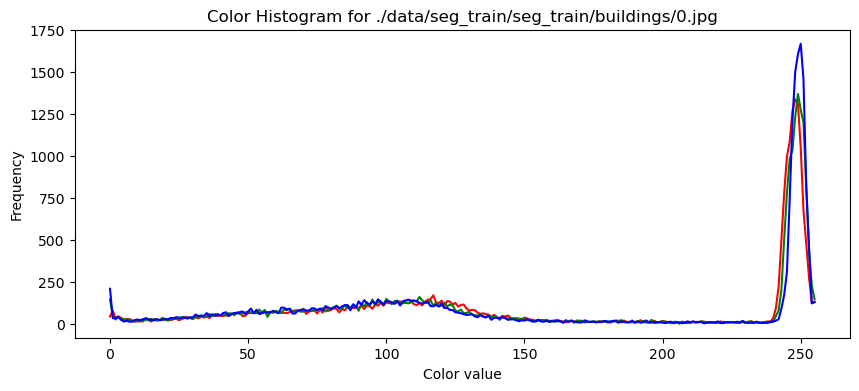

In [56]:
def plot_color_histogram(image_path, bins=256):
    histogram = calculate_histogram(image_path, bins)

    # Split histogram for each channel
    r_hist = histogram[:bins]
    g_hist = histogram[bins:2*bins]
    b_hist = histogram[2*bins:]

    # Create an array with the bin numbers
    bin_edges = np.arange(bins+1)

    # Plotting
    plt.figure(figsize=(10, 4))
    plt.plot(bin_edges[:-1], r_hist, color='red')
    plt.plot(bin_edges[:-1], g_hist, color='green')
    plt.plot(bin_edges[:-1], b_hist, color='blue')
    plt.title(f'Color Histogram for {image_path}')
    plt.xlabel('Color value')
    plt.ylabel('Frequency')
    plt.show()

# Example usage:
plot_color_histogram(train_buildings_df['files'][0])


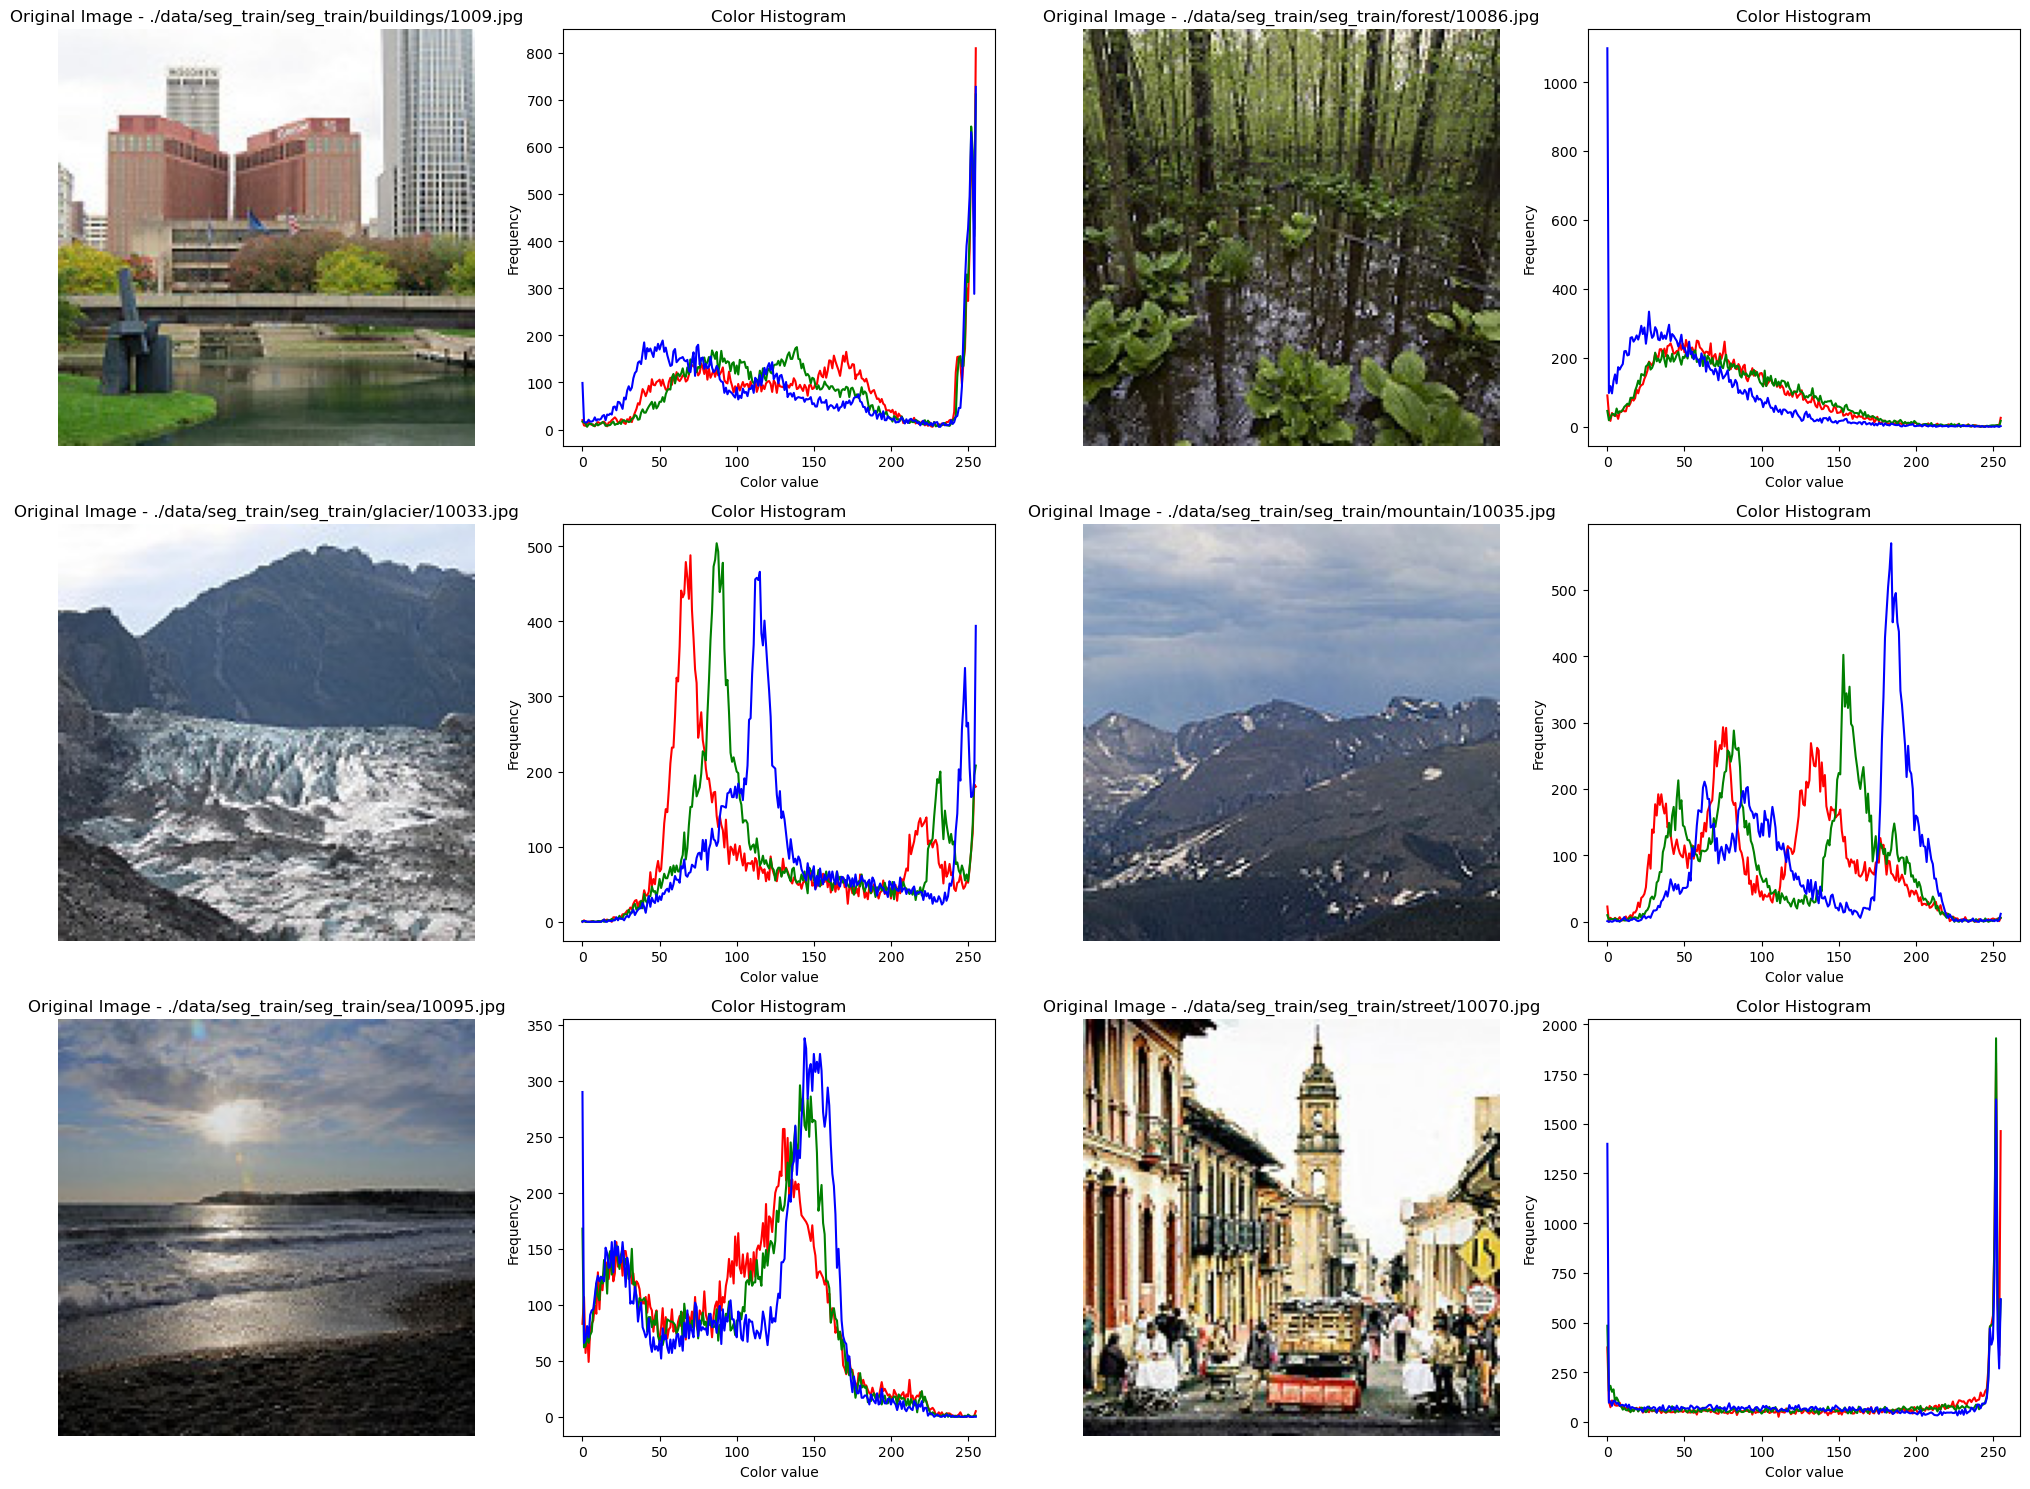

In [62]:
# plot sample image and histogram from each category
def plot_color_histogram_subplots(ax, image_path, bins=256):
    histogram = calculate_histogram(image_path, bins)

    # Split histogram for each channel
    r_hist = histogram[:bins]
    g_hist = histogram[bins:2*bins]
    b_hist = histogram[2*bins:]

    # Create an array with the bin numbers
    bin_edges = np.arange(bins+1)

    # Plotting
    ax.plot(bin_edges[:-1], r_hist, color='red')
    ax.plot(bin_edges[:-1], g_hist, color='green')
    ax.plot(bin_edges[:-1], b_hist, color='blue')
    ax.set_title(f'Color Histogram')
    ax.set_xlabel('Color value')
    ax.set_ylabel('Frequency')

def plot_images_with_histograms(categories):
    fig, axs = plt.subplots(3, 4, figsize=(20, 15))

    for i, category in enumerate(categories):
        # Use .iloc[x] to get the first row of the DataFrame regardless of its index
        image_path = category['files'].iloc[8]

        # Plot original image
        img = plt.imread(image_path)
        axs[i // 2, 2 * (i % 2)].imshow(img)
        axs[i // 2, 2 * (i % 2)].axis('off')
        axs[i // 2, 2 * (i % 2)].set_title(f'Original Image - {image_path}')

        # Plot histogram
        plot_color_histogram_subplots(axs[i // 2, 2 * (i % 2) + 1], image_path)

    plt.tight_layout()
    plt.savefig('Sample image and histogram plot_(seg_train).png')
    plt.show()

# Example usage:
categories = [train_buildings_df, train_forest_df, train_glacier_df, train_mountain_df, train_sea_df, train_street_df]
plot_images_with_histograms(categories)


Step 2: Compare Histograms Across Categories


In [47]:
def average_histogram(df):
    histograms = create_histogram_features(df)
    avg_histogram = np.mean(histograms, axis=0)
    return avg_histogram

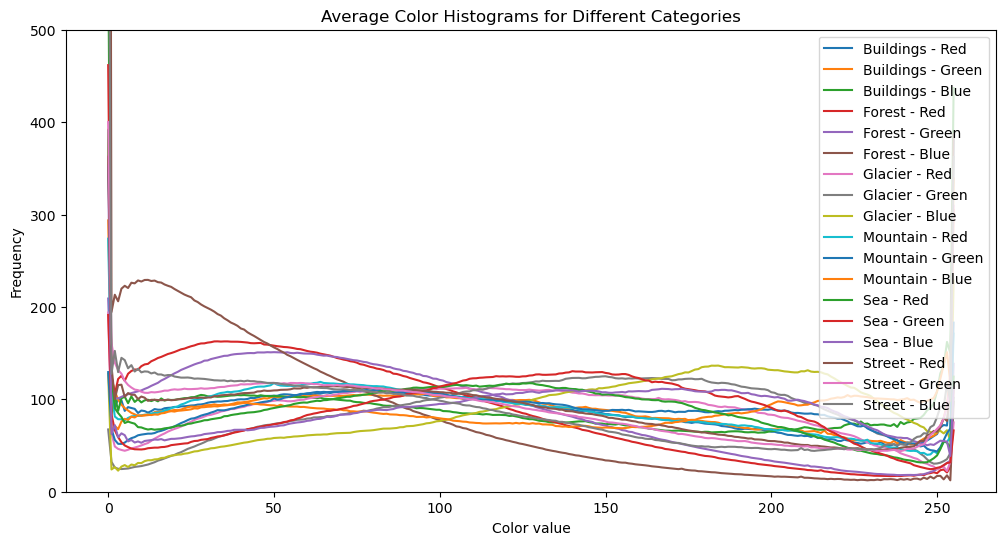

In [50]:
def plot_average_histograms(category_dfs, ymin=None, ymax=None):
    bins = 256
    bin_edges = np.arange(bins+1)
    plt.figure(figsize=(12, 6))

    for category, df in category_dfs.items():
        avg_hist = average_histogram(df)
        
        # Split histogram for each channel
        r_hist = avg_hist[:bins]
        g_hist = avg_hist[bins:2*bins]
        b_hist = avg_hist[2*bins:]

        # Plotting
        plt.plot(bin_edges[:-1], r_hist, label=f'{category} - Red')
        plt.plot(bin_edges[:-1], g_hist, label=f'{category} - Green')
        plt.plot(bin_edges[:-1], b_hist, label=f'{category} - Blue')

    plt.title('Average Color Histograms for Different Categories')
    plt.xlabel('Color value')
    plt.ylabel('Frequency')

    # Set y-axis limits 
    if ymin is not None or ymax is not None:
        plt.ylim(ymin, ymax)

    plt.legend()
    plt.show()

# Example usage with y-axis limits:
category_train_dfs = {'Buildings': train_buildings_df, 'Forest': train_forest_df, 'Glacier': train_glacier_df, \
                'Mountain': train_mountain_df, 'Sea': train_sea_df, 'Street': train_street_df}
plot_average_histograms(category_train_dfs, ymin=0, ymax=500)


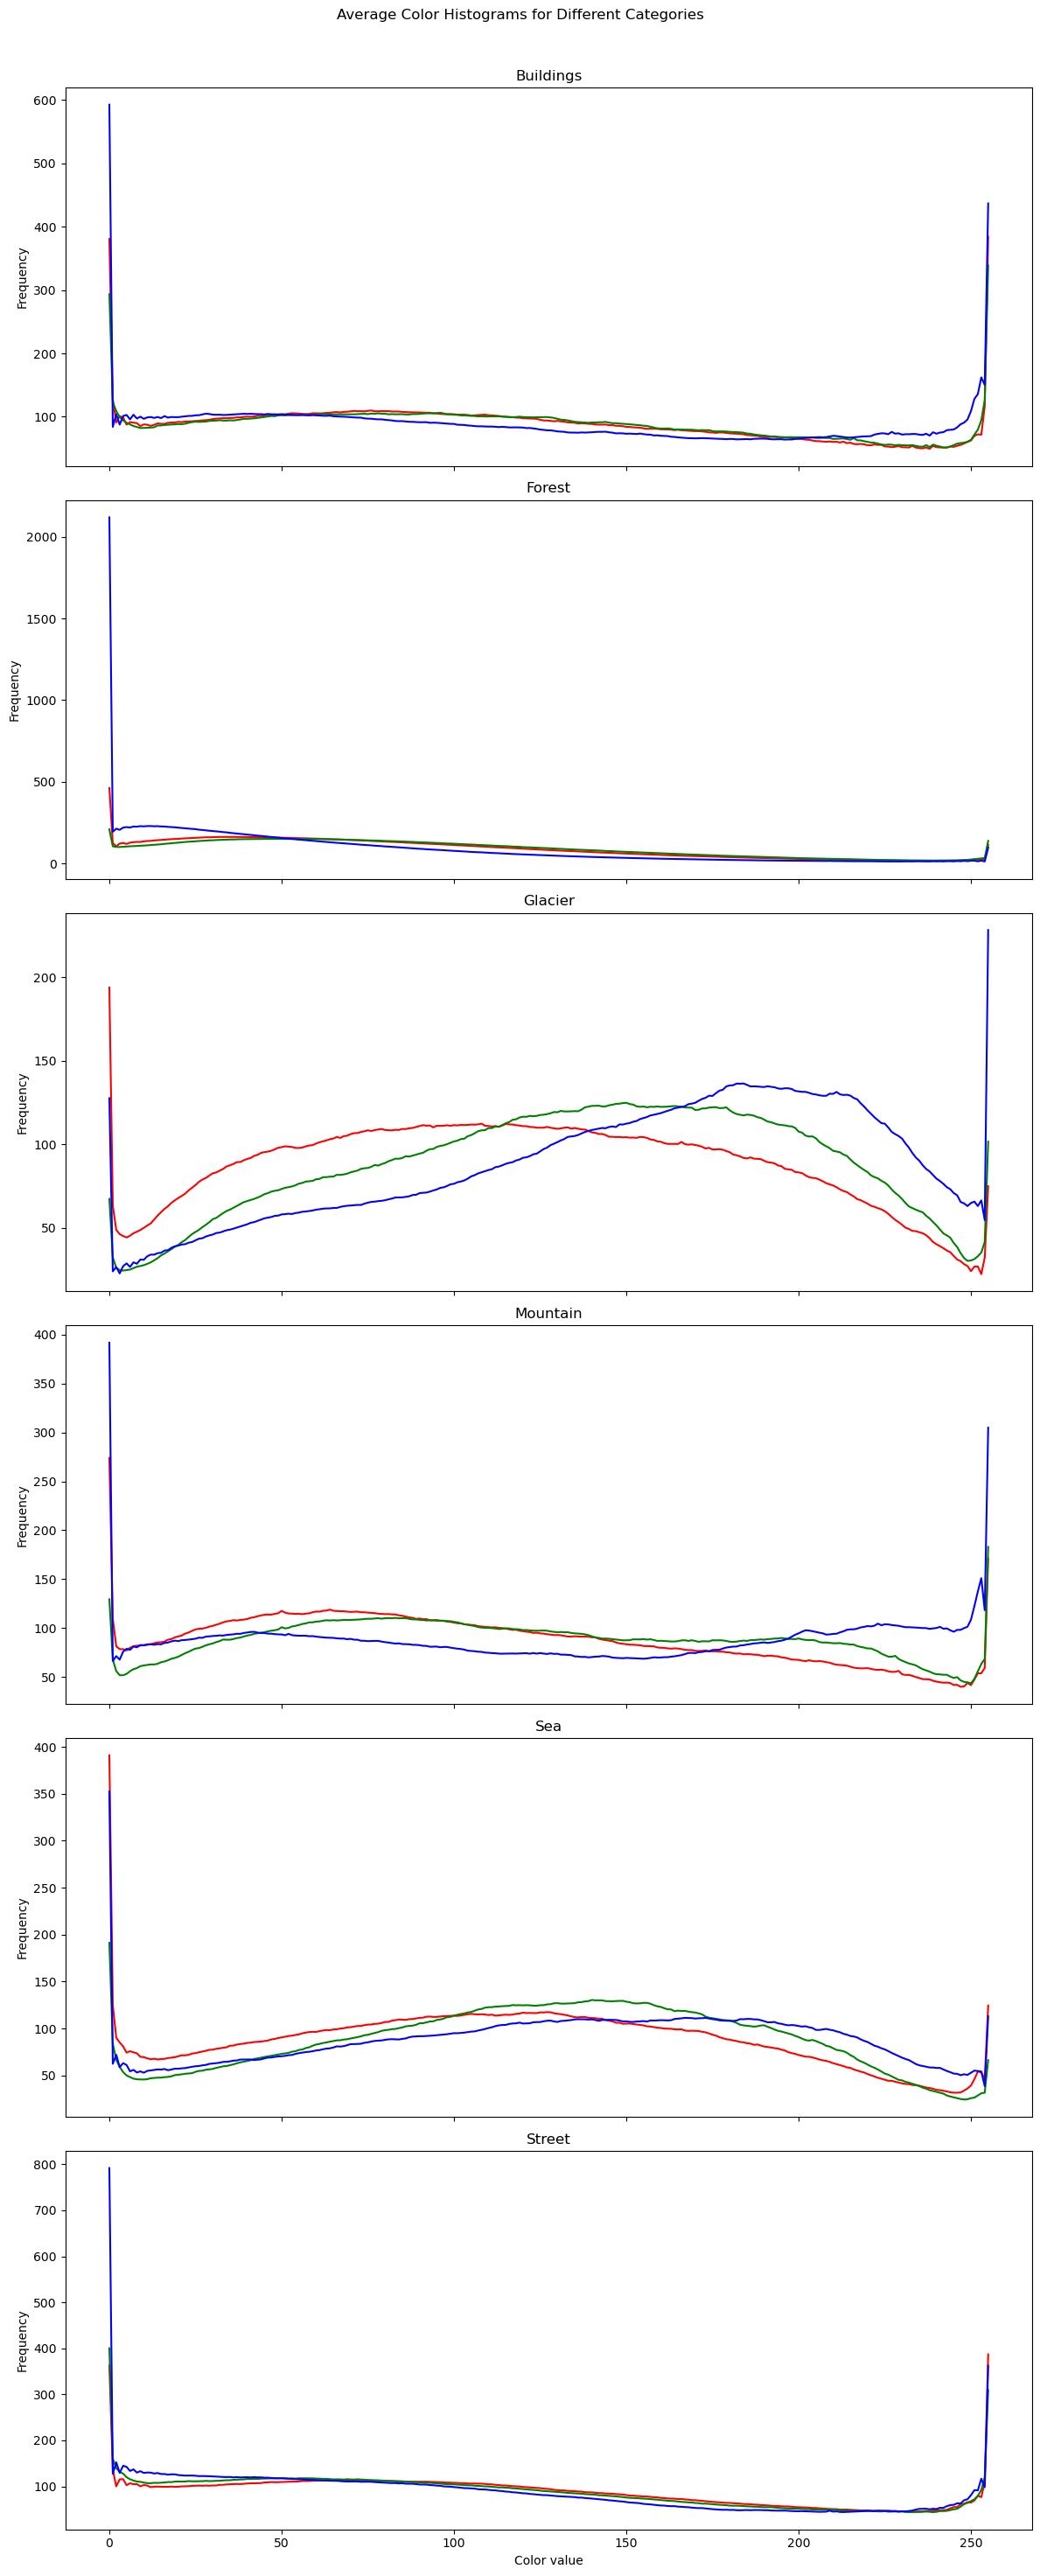

In [51]:
def plot_average_histograms_subplots(category_dfs):
    bins = 256
    bin_edges = np.arange(bins+1)
    fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(12, 30), sharex=True)

    for ax, (category, df) in zip(axes, category_dfs.items()):
        avg_hist = average_histogram(df)
        
        # Split histogram for each channel
        r_hist = avg_hist[:bins]
        g_hist = avg_hist[bins:2*bins]
        b_hist = avg_hist[2*bins:]

        # Plotting on the respective subplot
        ax.plot(bin_edges[:-1], r_hist, color='red')
        ax.plot(bin_edges[:-1], g_hist, color='green')
        ax.plot(bin_edges[:-1], b_hist, color='blue')
        ax.set_title(f'{category}')
        ax.set_ylabel('Frequency')

    # Set common labels
    plt.xlabel('Color value')
    fig.suptitle('Average Color Histograms for Different Categories')

    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.savefig('Average color historgram for different categories.png')
    plt.show()

# Example usage:
category_train_dfs = {'Buildings': train_buildings_df, 'Forest': train_forest_df, 'Glacier': train_glacier_df,
                'Mountain': train_mountain_df, 'Sea': train_sea_df, 'Street': train_street_df}
plot_average_histograms_subplots(category_train_dfs)
